# Capstone II: Craiglist Used Car Dataset
### Part 3: Preprocessing and Model Development

Biman Mondal\
May 16, 2025

The goal of this capstone project is to create a model that predicts the price using the features in the dataset.

Step 1: Data Wrangling: CapstoneTwo_CLCarDataset_DataWrangling.ipynb

Step 2: EDA
We visualized the numerical and categorical data. The price skews right and has a mean around 20k. Most of the vehicles are from the 2000's. There are over 30k unique model names. The columns not likely to be useful in predicting price were dropped from the dataframe.

Step 3: Preprocessing 
In this notebook, further steps are taken to scrub the dataset of N/A values, imputing common values, and dropping outliers
The categorical features of the dataset will be encoded in preparation for modeling

This notebook uses the dataset output from step 2 'step2_vehicles_eda.csv'

Original Dataset .csv file downloaded from Kaggle:
https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

In [1]:
# Import numpy package
import numpy as np
# Import pandas package
import pandas as pd
# Import matplotlib package
import matplotlib.pyplot as plt
# Import the seaborn package
import seaborn as sns
# Import datetime
import datetime as dt
# Import category encoder
import category_encoders as ce
# Import missingno package
import missingno as msno

In [2]:
vehicles = pd.read_csv('./data/step2_vehicles_eda.csv', header='infer',index_col='id')
#vehicles.set_index('id', inplace=True)
vehicles['year'] = vehicles['year'].astype(int)

In [3]:
vehicles.sample(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type
id,,,,,,,,,,,,
7310262904,13998,2011,chevrolet,silverado,good,8.0,gas,150853.0,clean,automatic,4wd,pickup
7307923782,37495,2018,bmw,5 series,good,6.0,gas,41319.0,clean,automatic,4wd,sedan
7314384424,17897,2015,lincoln,mkz,good,6.0,gas,91067.0,clean,other,fwd,sedan
7313975665,3900,2008,dodge,charger,excellent,6.0,gas,172549.0,clean,automatic,fwd,van
7311929138,42999,2015,gmc,yukon,good,8.0,gas,77565.0,clean,automatic,4wd,SUV


In [4]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294684 entries, 7316814884 to 7301591129
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         294684 non-null  int64  
 1   year          294684 non-null  int32  
 2   manufacturer  285893 non-null  object 
 3   model         292314 non-null  object 
 4   condition     294684 non-null  object 
 5   cylinders     294684 non-null  float64
 6   fuel          294684 non-null  object 
 7   odometer      294684 non-null  float64
 8   title_status  288621 non-null  object 
 9   transmission  293252 non-null  object 
 10  drive         294684 non-null  object 
 11  type          294684 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(8)
memory usage: 28.1+ MB


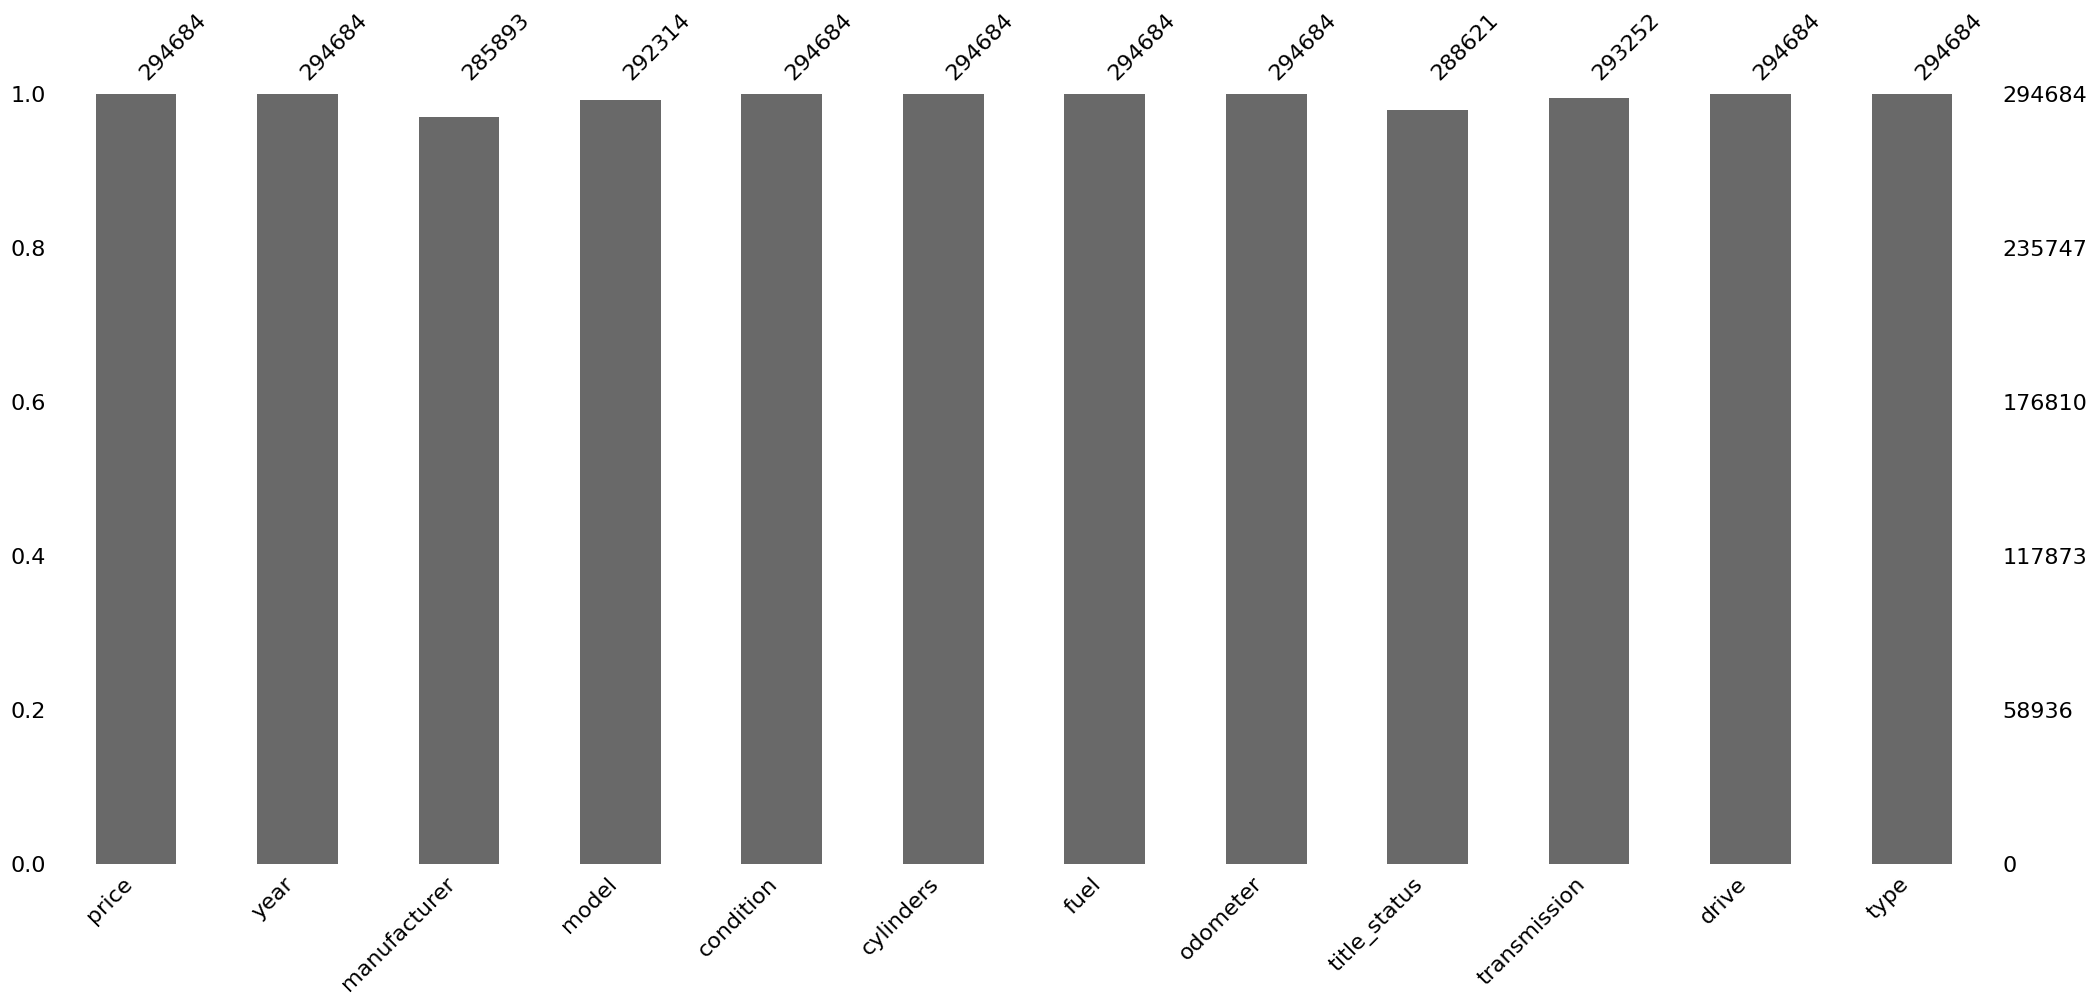

In [5]:
msno.bar(vehicles)
plt.show()

## 1. Remove all NA values from Model & Manufacturer

In [6]:
model_na = vehicles.loc[vehicles['model'].isna(),'model']
print(f'Before:{len(model_na)} rows with no model name.\n')
vehicles.dropna(subset=['model'], axis=0, inplace=True)
print(f"After:{vehicles['model'].isna().sum()} rows with no model name.\n")

Before:2370 rows with no model name.

After:0 rows with no model name.



In [7]:
### Manufacturer
manufacturer_na = vehicles.loc[vehicles['manufacturer'].isna(),['manufacturer','model']]
print(f'Before: {len(manufacturer_na)} rows with no manufacturer name.\n')
# manufacturer_na
vehicles.dropna(subset=['manufacturer'], axis=0, inplace=True)
print(f'After: {vehicles["manufacturer"].isna().sum()} rows with no manufacturer name.\n')

Before: 8791 rows with no manufacturer name.

After: 0 rows with no manufacturer name.



In [8]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283523 entries, 7316814884 to 7301591129
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         283523 non-null  int64  
 1   year          283523 non-null  int32  
 2   manufacturer  283523 non-null  object 
 3   model         283523 non-null  object 
 4   condition     283523 non-null  object 
 5   cylinders     283523 non-null  float64
 6   fuel          283523 non-null  object 
 7   odometer      283523 non-null  float64
 8   title_status  277526 non-null  object 
 9   transmission  282143 non-null  object 
 10  drive         283523 non-null  object 
 11  type          283523 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(8)
memory usage: 27.0+ MB


In [9]:
### Drive
#print(help(vehicles['drive'].hist(align='mid')))
#vehicles['drive'].hist(align='left',edgecolor='black')
#plt.show()
drive_na = vehicles.loc[vehicles['drive'].isna(),['manufacturer','model','type','drive']]
print(f'\nThere are {len(drive_na)} rows without the drive type specified.\n')
vehicles['drive'] = vehicles['drive'].fillna('fwd')


There are 0 rows without the drive type specified.



In [10]:
### Transmission
#vehicles['transmission'].hist(rwidth=1.0,align='left')
#plt.show()
transmission_na = vehicles.loc[vehicles['transmission'].isna(),['manufacturer','model','type','transmission']]
#transmission_na.sample(10)
vehicles['transmission'] = vehicles['transmission'].fillna('automatic')

In [11]:
### Type
#vehicles.loc[vehicles['type']=='offroad',['year','manufacturer','model','type']]
type_map = {'offroad':'SUV','hatchback':'sedan','coupe':'sedan','convertible':'sedan','wagon':'sedan'}
vehicles['type'] = vehicles['type'].replace(type_map)

In [12]:
#ax = vehicles['type'].hist(align='mid',rwidth=0.5)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
#plt.show()
vehicles['type'] = vehicles['type'].fillna('sedan')
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283523 entries, 7316814884 to 7301591129
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         283523 non-null  int64  
 1   year          283523 non-null  int32  
 2   manufacturer  283523 non-null  object 
 3   model         283523 non-null  object 
 4   condition     283523 non-null  object 
 5   cylinders     283523 non-null  float64
 6   fuel          283523 non-null  object 
 7   odometer      283523 non-null  float64
 8   title_status  277526 non-null  object 
 9   transmission  283523 non-null  object 
 10  drive         283523 non-null  object 
 11  type          283523 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(8)
memory usage: 27.0+ MB


In [13]:
### Title Status
print(vehicles['title_status'].unique())

na_title_status = vehicles.loc[vehicles['title_status'].isna(),['manufacturer','model','title_status']]
na_title_status
# Replace na values in title_status
vehicles['title_status'] = vehicles['title_status'].fillna('clean')

# Replace missing and lien to clean
vehicles['title_status'] = vehicles['title_status'].replace({'missing': 'clean'})

['clean' 'rebuilt' 'lien' nan 'missing']


## 2. Condense model category 
There are nearly 19k "unique" model categories because the models are entered by the user there is a variety of ways to put a vehicle's model e.g. 150, F-150, F-150 EX, etc. These names of the models need to be simplified.\
Assign standard labels for the top 40 vehicle models including for f-150, f-250, silverado, and other.

In [14]:
print(f"There are {vehicles['model'].nunique():,} unique models in the dataset!!")
print(vehicles['model'].value_counts().nlargest(10))

There are 18,845 unique models in the dataset!!
model
f-150             5376
silverado 1500    3426
1500              2757
camry             2007
accord            1975
silverado         1946
civic             1935
tacoma            1884
escape            1810
wrangler          1733
Name: count, dtype: int64


In [15]:
# Combine the f-150 models
vehicles.loc[(vehicles.model.str.contains("f150"))&(vehicles.manufacturer=='ford'),'model'] = 'f-150'
f150_pattern ="f-[150]."
#vehicles.loc[vehicles.model.str.contains(f150_pattern),'model'] = 'f-150'
#vehicles.loc[((vehicles.model.str.contains(f150_pattern))&(vehicles.manufacturer=='ford')),['manufacturer','model']]
vehicles.loc[((vehicles.model.str.contains(f150_pattern))&(vehicles.manufacturer=='ford')),'model']='f-150'

# Combine the f-250 model segment
vehicles.loc[vehicles.model.str.contains('f.250.'), 'model']
vehicles.loc[(vehicles.model.str.contains('.f*.250.')) & (vehicles.manufacturer=='ford'),'model'] = 'f-250'
vehicles.loc[vehicles.model.str.contains('f*.250.') & (vehicles.manufacturer=='ford'),'model'] = 'f-250'
vehicles.loc[vehicles.model.str.contains('f250') & (vehicles.manufacturer=='ford'),'model'] = 'f-250'

# Combine all f-350 model segments
vehicles.loc[(vehicles.model.str.contains('.f-350.')) & (vehicles.manufacturer=='ford'),'model'] = 'f-350'
vehicles.loc[(vehicles.model.str.contains('.350.')) & (vehicles.manufacturer=='ford'),'model'] = 'f-350'
vehicles.loc[(vehicles.model.str.contains('f350')) & (vehicles.manufacturer=='ford'),'model'] = 'f-350'

# Combine all the silverado 1500 
vehicles.loc[(vehicles.model.str.contains('.*silverado 1500.*')) & (vehicles.manufacturer=='chevrolet'),'model'] = 'silverado 1500'
vehicles.loc[(vehicles.model.str.contains('1500')) & (vehicles.manufacturer=='chevrolet'),'model'] = 'silverado 1500'
vehicles.loc[(vehicles.model.str.contains('silverado$')) & (vehicles.manufacturer=='chevrolet'),'model'] = 'silverado 1500'
vehicles.loc[(vehicles.model.str.contains('.*1500.*')) & (vehicles.manufacturer=='chevrolet'),'model'] = 'silverado 1500'

# Combine all the silverado 2500 
vehicles.loc[(vehicles.model.str.contains('.*silverado 2500.*')) & (vehicles.manufacturer=='chevrolet'),'model'] = 'silverado 2500'
vehicles.loc[(vehicles.model.str.contains('sierra 2500hd')) & (vehicles.manufacturer=='chevrolet'),'model'] = 'silverado 2500'
vehicles.loc[(vehicles.model.str.contains('2500')) & (vehicles.manufacturer=='chevrolet'),'model'] = 'silverado 2500'
vehicles.loc[(vehicles.model.str.contains('.*silverado 3500.*')) & (vehicles.manufacturer=='chevrolet'),'model'] = 'silverado 3500'

# Combine all ram 1500 
vehicles.loc[(vehicles.model.str.contains('.*1500.*')) & (~vehicles.model.str.contains('.*van.*')) & (vehicles.manufacturer=='ram'),'model'] = '1500'
# Combine all ram 2500
vehicles.loc[(vehicles.model.str.contains('.*2500.*')) & (~vehicles.model.str.contains('.*van.*'))& (vehicles.manufacturer=='ram'),'model'] = '2500'
# Combine all ram 3500
vehicles.loc[(vehicles.model.str.contains('.*3500.*')) & (~vehicles.model.str.contains('.*van.*'))& (vehicles.manufacturer=='ram'),'model']  = '3500'

# Combine toyota tacoma models
vehicles.loc[vehicles.model.str.contains('tacoma'), 'model'] = 'tacoma'
# Combine toyota tundra models
vehicles.loc[vehicles.model.str.contains('tundra'), 'model'] = 'tundra'
vehicles.loc[vehicles.model.str.contains('.*camry.*'), 'model'] = 'camry'
vehicles.loc[vehicles.model.str.contains('.*corolla.*'), 'model'] = 'corolla'
# Other models
vehicles.loc[(vehicles.model.str.contains('.*wrangler.*')) & (vehicles.manufacturer=='jeep'),'model'] = 'wrangler'
vehicles.loc[vehicles.model.str.contains('.*accord.*'), 'model'] = 'accord'
vehicles.loc[vehicles.model.str.contains('.*civic.*'), 'model'] = 'civic'
vehicles.loc[vehicles.model.str.contains('.*escape.*'), 'model'] = 'escape'
vehicles.loc[vehicles.model.str.contains('.*altima.*'), 'model'] = 'altima'
vehicles.loc[vehicles.model.str.contains('.*explorer.*'), 'model'] = 'explorer'
vehicles.loc[vehicles.model.str.contains('.*cherokee.*'), 'model'] = 'cherokee'
vehicles.loc[vehicles.model.str.contains('.*mustang.*'), 'model'] = 'mustang'
vehicles.loc[vehicles.model.str.contains('.*fusion.*'), 'model'] = 'fusion'
vehicles.loc[vehicles.model.str.contains('.*cr-v.*'), 'model'] = 'cr-v'
vehicles.loc[vehicles.model.str.contains('.*focus.*'), 'model'] = 'focus'
vehicles.loc[vehicles.model.str.contains('.*outback.*'), 'model'] = 'outback'
vehicles.loc[vehicles.model.str.contains('.*impala.*'), 'model'] = 'impala'
vehicles.loc[vehicles.model.str.contains('.*malibu.*'), 'model'] = 'malibu'
vehicles.loc[vehicles.model.str.contains('.*rav4.*'), 'model'] = 'rav4'
vehicles.loc[vehicles.model.str.contains('.*corvette.*'), 'model'] = 'corvette'
vehicles.loc[vehicles.model.str.contains('.*charger.*'), 'model'] = 'charger'
vehicles.loc[vehicles.model.str.contains('.*grand caravan.*'), 'model'] = 'grand caravan' 
vehicles.loc[vehicles.model.str.contains('.*sierra 1500.*'), 'model'] = 'sierra 1500'
vehicles.loc[vehicles.model.str.contains('.*tahoe.*'), 'model'] = 'tahoe'
vehicles.loc[vehicles.model.str.contains('.*odyssey.*'), 'model'] = 'odyssey'
vehicles.loc[vehicles.model.str.contains('.*cruze.*'), 'model'] = 'cruze'
vehicles.loc[vehicles.model.str.contains('.*sonata.*'), 'model'] = 'sonata'
vehicles.loc[vehicles.model.str.contains('.*jetta.*'), 'model'] = 'jetta'
vehicles.loc[vehicles.model.str.contains('.*prius.*'), 'model'] = 'prius'
vehicles.loc[vehicles.model.str.contains('.*edge.*'), 'model'] = 'edge'
vehicles.loc[vehicles.model.str.contains('.*elantra.*'), 'model'] = 'elantra'
vehicles.loc[vehicles.model.str.contains('.*colorado.*'), 'model'] = 'colorado'
vehicles.loc[vehicles.model.str.contains('.*camaro.*'), 'model'] = 'camaro'
vehicles.loc[vehicles.model.str.contains('.*sierra.*'), 'model'] = 'sierra'
vehicles.loc[vehicles.model.str.contains('.*miata.*'), 'model'] = 'miata'
vehicles.loc[vehicles.model.str.contains('.*mdx.*'), 'model'] = 'mdx'
vehicles.loc[vehicles.model.str.contains('.*expedition.*'), 'model'] = 'expedition'
vehicles.loc[vehicles.model.str.contains('.*ranger.*'), 'model'] = 'ranger'
vehicles.loc[vehicles.model.str.contains('.*3 series.*'), 'model'] = '3 series'
vehicles.loc[vehicles.model.str.contains('.*4runner.*'), 'model'] = '4runner'
vehicles.loc[vehicles.model.str.contains('.*soul.'), 'model'] = 'soul'
vehicles.loc[vehicles.model.str.contains('.*c-class.'), 'model'] = 'c-class'
vehicles.loc[vehicles.model.str.contains('.*challenger.'), 'model'] = 'challenger'
vehicles.loc[vehicles.model.str.contains('.*yukon.'), 'model'] = 'yukon'
vehicles.loc[vehicles.model.str.contains('.*suburban.'), 'model'] = 'suburban'
vehicles.loc[vehicles.model.str.contains('.*xt4.'), 'model'] = 'xt4'
vehicles.loc[vehicles.model.str.contains('.*ls 460.'), 'model'] = 'ls 460'
vehicles.loc[vehicles.model.str.contains('.*traverse.'), 'model'] = 'traverse'

In [16]:
print(f'The vehicle dataframe has {vehicles.shape[0]:,} rows and {vehicles.shape[1]} columns.')
print(f"There are still {vehicles['model'].nunique():,} unique models in the dataset!!")

The vehicle dataframe has 283,523 rows and 12 columns.
There are still 12,118 unique models in the dataset!!


In [17]:
# Even after combining common vehicle models there are still unique model names in the dataset
vehicles['model']

id
7316814884                      sierra
7316814758              silverado 1500
7316814989              silverado 1500
7316743432                      tundra
7316356412                       f-150
                        ...           
7301591192           maxima s sedan 4d
7301591187    s60 t5 momentum sedan 4d
7301591147                         xt4
7301591140             es 350 sedan 4d
7301591129    4 series 430i gran coupe
Name: model, Length: 283523, dtype: object

In [18]:
# Choose to keep 60 of the most common vehicles in the dataset
top_models = vehicles['model'].value_counts().nlargest(60)
vehicles_sub = vehicles[vehicles['model'].isin(top_models.index)]
print(f"Reduced model from {vehicles.shape[0]:,} rows to {vehicles_sub.shape[0]:,} rows.")

Reduced model from 283,523 rows to 150,475 rows.


### Condense Other Categorical Feature

In [19]:
# Set the cut ff 
vehicles_sub = vehicles_sub[vehicles_sub['year']>1980]

In [20]:
# Combine categories that are not 'clean' and label them as 'other'
vehicles.loc[vehicles['title_status'].isin(["missing",'rebuilt','lien',np.nan]),'title_status']='other'
print(vehicles['title_status'].unique())

['clean' 'other']


In [21]:
print(vehicles['transmission'].unique())
# Set the na and 'other' categories as 'automatic'
vehicles.loc[vehicles['transmission'].isin([np.nan,'other']),['transmission']] = 'automatic'

['other' 'automatic' 'manual']


In [22]:
# Assign the nan in drive as front-wheel-drive
vehicles.loc[vehicles['drive'].isin([np.nan]),['drive']] = 'fwd'

## 3. Plot Distribution of Numerical Features

In [23]:
vehicles_sub.describe()

,price,year,cylinders,odometer
count,149771.000000,149771.000000,149771.000000,149771.000000
mean,21619.114041,2012.789178,6.082860,92423.252919
std,14916.976321,5.746392,1.347995,63143.634765
min,500.000000,1981.000000,3.000000,1.000000
25%,9472.500000,2010.000000,6.000000,37218.000000
50%,18770.000000,2014.000000,6.000000,86381.000000
75%,30990.000000,2017.000000,6.000000,135908.000000
max,175000.000000,2022.000000,12.000000,349000.000000


68995.0
2002.0
204866.0


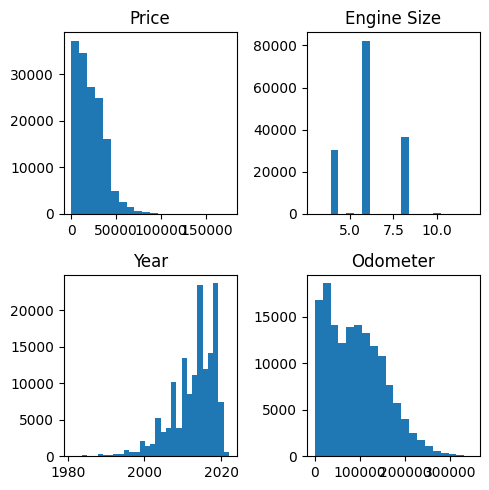

In [24]:
# Make subplots
fig, ax = plt.subplots(2,2, figsize=(5, 5))
# Plot price
print(vehicles_sub['price'].quantile(0.99).round(1))
#vehicles = vehicles[vehicles['price']<100000]
ax[0,0].hist(vehicles_sub['price'],bins=20)
ax[0,0].set_title('Price')

ax[0,1].hist(vehicles_sub['cylinders'],bins=20)
ax[0,1].set_title('Engine Size')

print(vehicles_sub['year'].quantile(0.05))
ax[1,0].hist(vehicles_sub['year'],bins=30)
ax[1,0].set_title('Year')

print(vehicles_sub['odometer'].quantile(0.95).round(1))
ax[1,1].hist(vehicles_sub['odometer'],bins=20)
ax[1,1].set_title('Odometer')
#
plt.tight_layout()
plt.show()

## 4. Encode Categorical Features using OHE
The machine learning models require features to be numerical, thus categorical values need to be transformed. There are two types of categorical data: ordinal and nominal. For ordinal data there is a strict order e.g. small, medium, large. For nominal categorical data, there is no set hierarchy. 
One hot encoding assigns a new column for each category in the feature column. 

In [25]:
# Condition is categorical so it is suitable for single column mapping
# New > like new > excellent > good > fair
cond_map = {'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1}
vehicles['condition_num'] = vehicles['condition'].map(cond_map)
print(vehicles[['condition','condition_num']].sample(5))

            condition  condition_num
id                                  
7303694869       good              2
7316734537  excellent              3
7317046012  excellent              3
7310782160  excellent              3
7305472730       good              2


In [26]:
print(vehicles['condition'].unique())
print(vehicles['fuel'].unique())
print(vehicles['title_status'].unique())
print(vehicles['transmission'].unique())
print(vehicles['drive'].unique())
print(vehicles['type'].unique())

['good' 'excellent' 'fair' 'like new' 'new']
['gas' 'other' 'diesel' 'hybrid' 'electric']
['clean' 'other']
['automatic' 'manual']
['fwd' 'rwd' '4wd']
['pickup' 'other' 'sedan' 'SUV' 'van']


In [27]:
print(f"There are {vehicles_sub['manufacturer'].nunique()} unique manufacturers in the dataset.")
print(vehicles_sub['manufacturer'].unique())

There are 20 unique manufacturers in the dataset.
['gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'ram' 'mazda' 'honda' 'dodge'
 'acura' 'hyundai' 'subaru' 'volkswagen' 'nissan' 'kia' 'mercedes-benz'
 'bmw' 'chrysler' 'land rover' 'jaguar']


In [28]:
print(f"There are {vehicles_sub['model'].nunique()} unique models in the dataset.")
print(vehicles_sub['model'].unique())

There are 60 unique models in the dataset.
['sierra' 'silverado 1500' 'tundra' 'f-150' 'tacoma' 'colorado' 'corvette'
 'wrangler' 'camaro' 'ranger' '1500' 'miata' 'f-250' 'odyssey' 'mustang'
 'charger' 'civic' 'expedition' 'mdx' 'sonata' 'cherokee' 'camry'
 'forester' 'jetta' 'sentra' 'silverado 2500' 'elantra' 'yukon' 'accord'
 'escape' 'tahoe' 'edge' 'soul' '4runner' 'traverse' '3500' 'impala'
 'altima' 'prius' 'challenger' 'malibu' 'c-class' 'corolla' 'f-350'
 'highlander' '2500' 'fusion' 'suburban' 'cr-v' 'grand caravan' '3 series'
 'equinox' 'focus' 'explorer' 'cruze' 'outback' 'pilot' 'sienna' 'rogue'
 'rav4']


In [29]:
encoder = ce.OneHotEncoder(cols=['manufacturer','model','fuel','title_status','transmission','drive','type'], 
                           use_cat_names=True,
                            return_df=True)
vehicle_transformed = encoder.fit_transform(vehicles_sub)
vehicle_transformed.head()
print(vehicle_transformed.shape)

(149771, 104)


### Run sample regression analysis

In [30]:
#vehicle_transformed = vehicle_transformed.drop('condition',axis=1)

In [31]:
# Drop original categorical columns
cols_to_drop = ['condition','manufacturer','model','fuel','title_status','transmission','drive','type']

for col in cols_to_drop:
    if vehicle_transformed.columns.isin([col]).any():
        vehicle_transformed = vehicle_transformed.drop(col, axis=1)

vehicle_transformed.head()
vehicle_transformed.columns
print(vehicle_transformed.shape)

(149771, 103)


In [32]:
vehicle_transformed.sample(5).T

id,7304783262,7309427913,7316500858,7315830798,7310573921
price,47990.0,36990.0,2800.0,14495.0,12998.0
year,2019.0,2020.0,2002.0,2006.0,2005.0
manufacturer_gmc,0.0,0.0,0.0,0.0,1.0
manufacturer_chevrolet,1.0,0.0,0.0,0.0,0.0
manufacturer_toyota,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
type_pickup,0.0,0.0,0.0,1.0,1.0
type_other,1.0,0.0,0.0,0.0,0.0
type_sedan,0.0,1.0,1.0,0.0,0.0
type_SUV,0.0,0.0,0.0,0.0,0.0


In [33]:
# Import regression modules
import statsmodels.api as sm

In [34]:
X = vehicle_transformed.drop('price',axis=1)
# Add a constant
X = sm.add_constant(X)
m = sm.OLS(vehicle_transformed['price'],X).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     5553.
Date:                Fri, 05 Dec 2025   Prob (F-statistic):               0.00
Time:                        09:19:52   Log-Likelihood:            -1.5439e+06
No. Observations:              149771   AIC:                         3.088e+06
Df Residuals:                  149683   BIC:                         3.089e+06
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [35]:
print(f'The model predicts the price with an error of ${np.sqrt(m.mse_resid).round()}')

The model predicts the price with an error of $7257.0


### Write Out Data

In [36]:
# Write the processed vehicle data to .csv file
vehicle_transformed.to_csv('./data/step3_vehicles_processed.csv')

### Summary

In this notebook, the dataset N/A values were removed or imputed. The extreme values (years <1980) were also removed. The dataset has been prepared for modeling by encoding the remaining categorical features. 

The "model" feature of the dataset poses a significant challenges to modeling as there are over 10,000 unique categories. The "model" feature was filtered for the top 60 common models and standard labels were applied manually. The rows not associated with the top 60 models were then dropped. This results in a much smaller dataset. A more optimum manner to condense the "model" feature will need to be investigated.

One hot encoding was applied to the categorical columns resulting in significan't column expansion of 104 columns. A preliminary linear regression fit of the entire dataset has an rsquared of 0.76 and an error of +/- $7,257 showing that the cleaned dataset is ready for modeling.  